# Analisando as Vendas

In [78]:
import pandas as pd

In [79]:
dados = pd.read_csv('alucar.csv')

In [80]:
dados.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [81]:
print('Quantidade de linhas e colunas:', dados.shape)

Quantidade de linhas e colunas: (24, 2)


In [82]:
print('Quantidade de dados nulos:',dados.isna().sum().sum())

Quantidade de dados nulos: 0


In [83]:
dados.dtypes

mes       object
vendas     int64
dtype: object

In [84]:
dados['mes'] = pd.to_datetime(dados['mes'])
dados.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [85]:
!pip install seaborn==0.9.0
import seaborn as sns 
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

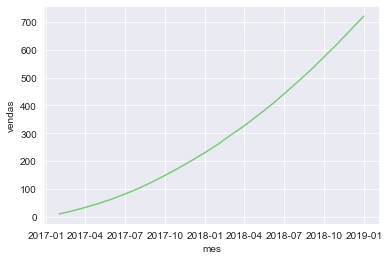

In [86]:
sns.lineplot(x='mes', y='vendas', data = dados)

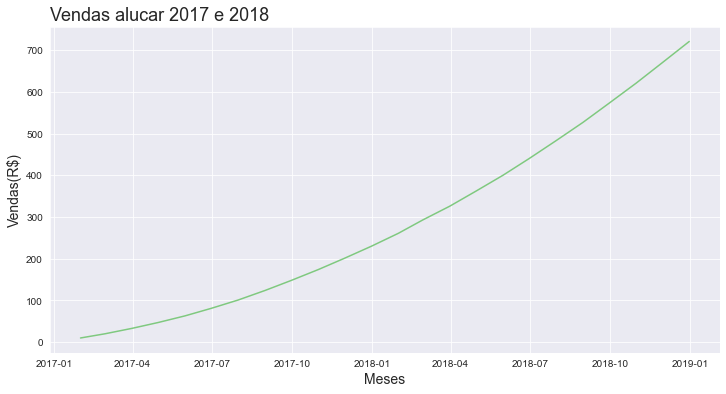

In [87]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data = dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas alucar 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Vendas(R$)', fontsize=14)
ax = ax 

In [88]:
dados['aumento'] = dados['vendas'].diff()
dados.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


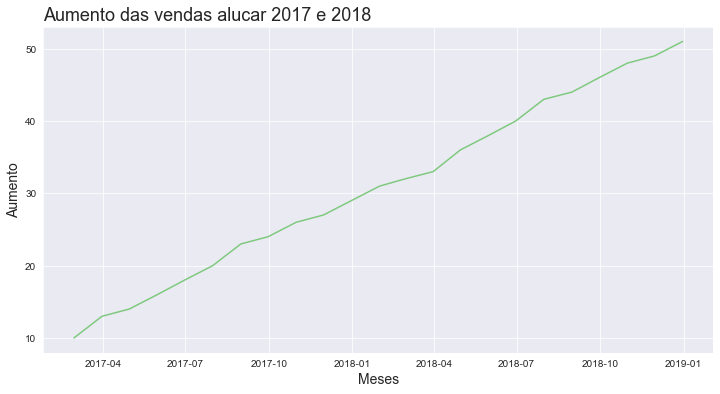

In [89]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data = dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas alucar 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax 

In [90]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax 

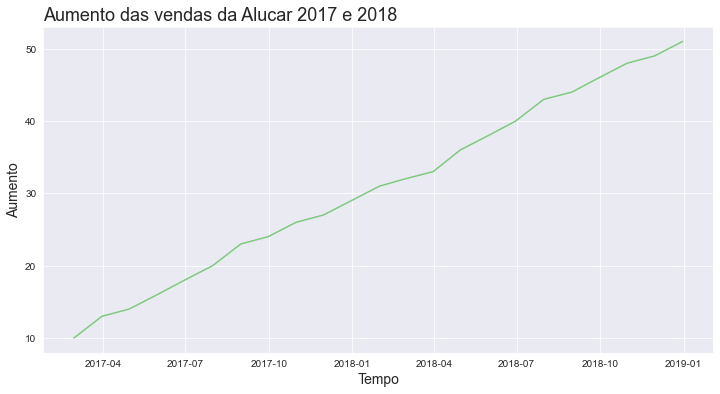

In [91]:
plotar('Aumento das vendas da Alucar 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', dados)

In [92]:
dados['aceleracao'] = dados['aumento'].diff()
dados.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


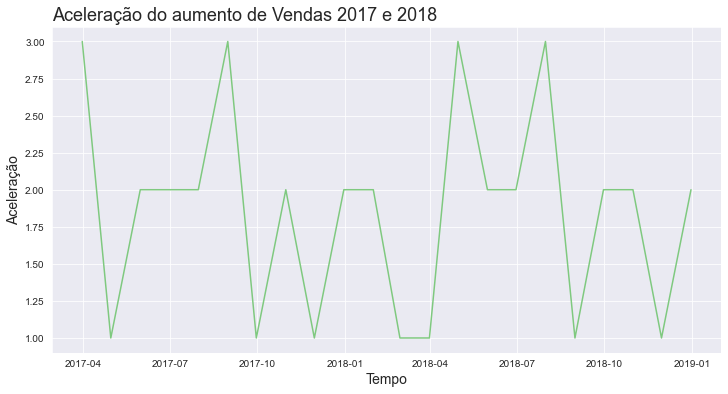

In [93]:
plotar('Aceleração do aumento de Vendas 2017 e 2018', 'Tempo', 'Aceleração', 'mes','aceleracao', dados )

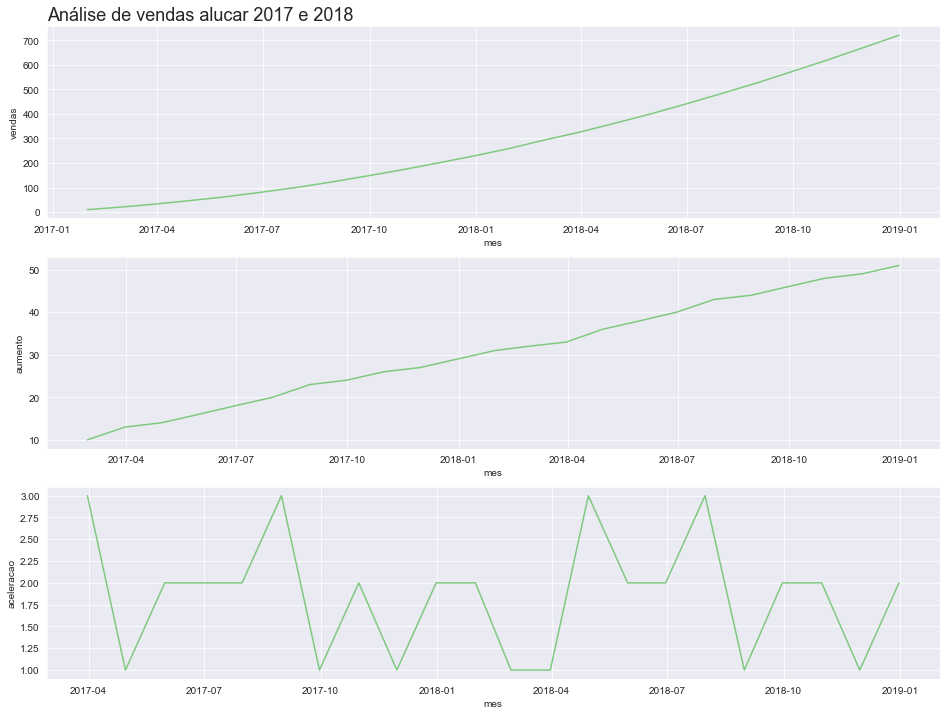

In [94]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas alucar 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data = dados)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data = dados)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data = dados)
ax = ax 

In [107]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data = dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data = dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data = dataset)
    ax = ax 

# Autocorrelação

In [96]:
from pandas.plotting import autocorrelation_plot

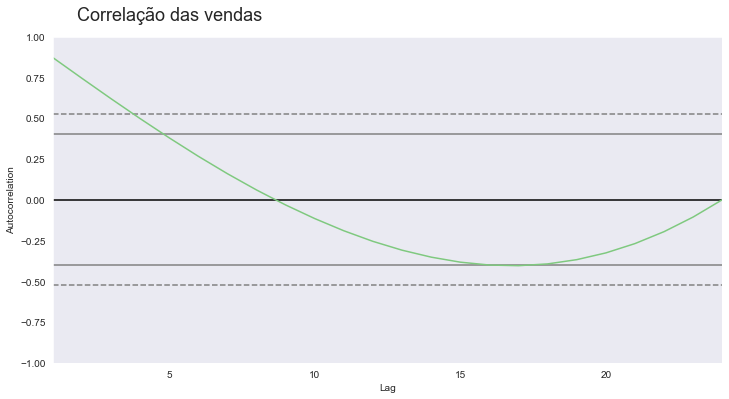

In [97]:
az = plt.figure(figsize=(12,6))
az.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(dados['vendas'])
az = az 

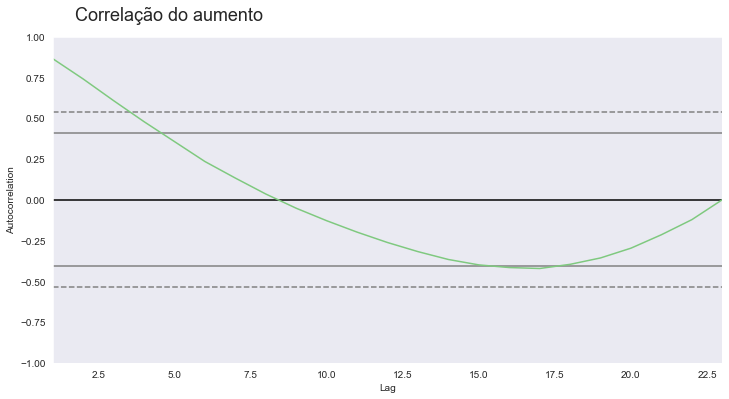

In [98]:
az = plt.figure(figsize=(12,6))
az.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(dados['aumento'][1:])
az = az 

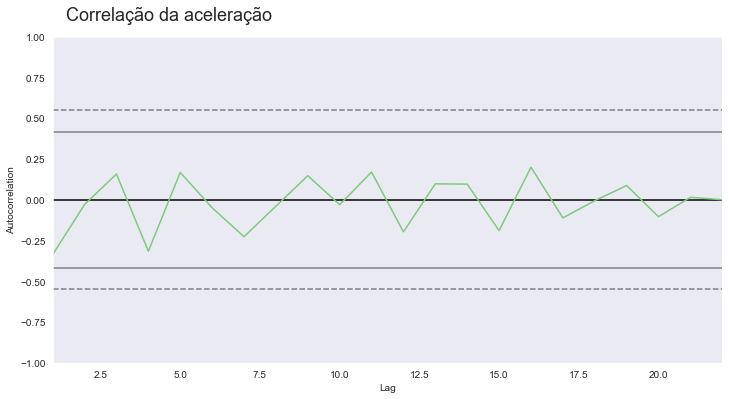

In [99]:
az = plt.figure(figsize=(12,6))
az.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(dados['aceleracao'][2:])
az = az 

# Análise assinantes da Newsletter

In [100]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [101]:
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [102]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [103]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


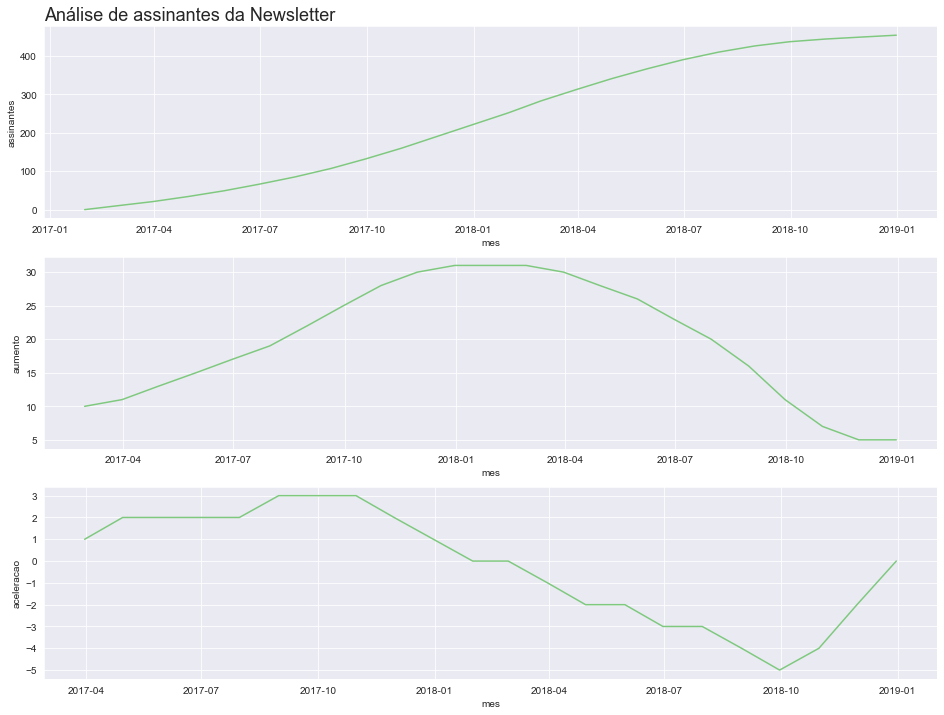

In [108]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da Newsletter')

# Chocolura 

In [109]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [110]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])


In [112]:
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de dados nulos', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos 0


In [114]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


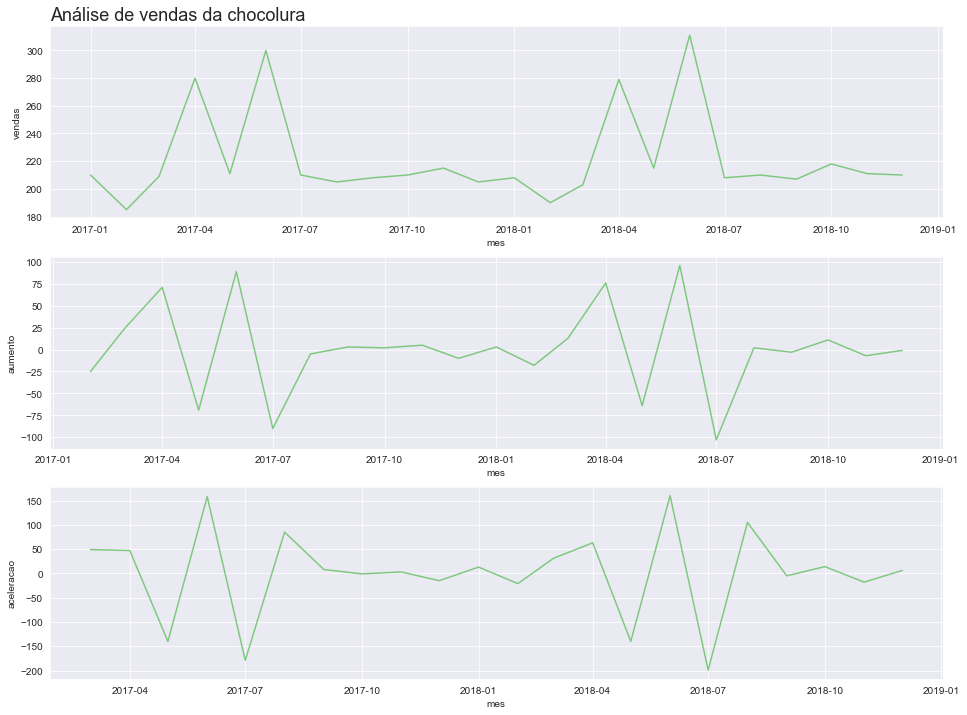

In [115]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da chocolura')